In [ ]:
# Pick up here
   # https://www.youtube.com/watch?v=d2wZPFKAFjc

In [65]:
"""
import pandas as pd

# Preprocessing
df = pd.read_csv('vend.csv').dropna()
txn = df.value_counts('Transaction')
txn = pd.DataFrame(txn, columns=['Basket']).reset_index()
df = df.merge(txn, how='left', on='Transaction')
df.sort_values('Basket', ascending=False)
df = df[['Transaction', 'TransDate', 'Machine', 'Product', 'Type', 'RCoil', 'RPrice', 'RQty', 'LineTotal', 'TransTotal', 'Basket']]
df_txn = pd.read_csv('unique.csv')
df.merge(df_txn, how='left', on='Product')
df = df[['Transaction', 'Date', 'Machine', 'Product', 'Type', 'Category', 'Healthy', 'Payment', 'Coil', 'Price', 'Qty', 'LineTotal', 'TransTotal', 'BasketSize']]
df = df.to_csv('vending_machine.csv')
# Manual edits, save as vending.csv

df['DayOfWeek'] = pd.to_datetime(df['Date'], format='%m/%d/%y').dt.strftime('%a')


from datetime import datetime, timedelta

# Convert 'Date' column to datetime format
df['Date2'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Function to get the week of the year starting on Saturday
def get_week_of_year(date):
    year_start = datetime(date.year, 1, 1)
    days_offset = (6 - year_start.weekday()) % 7  # Offset to adjust for starting on Saturday
    year_start += timedelta(days=days_offset)
    week_number = (date - year_start).days // 7 + 1
    return week_number

# Add a new column for week of the year
df['WeekOfYear'] = df['Date2'].apply(get_week_of_year)
"""

In [86]:
import pandas as pd

df = pd.read_csv('vending.csv')
df

,Transaction,Date,DayOfWeek,WeekNum,Location,Product,Type,Category,HealthyMarketing,Payment,Coil,Price,Quantity,LineTotal,TransTotal,BasketSize
0,0,1/1/22,Sat,0,Mall,Red Bull - Energy Drink - Sugar Free,Drink,Carbonated,True,Credit,148,3.5,1,3.5,3.5,1
1,1,1/1/22,Sat,0,Mall,Red Bull - Energy Drink - Sugar Free,Drink,Carbonated,True,Credit,148,3.5,1,3.5,5.0,2
2,2,1/1/22,Sat,0,Mall,Takis - Hot Chilli Pepper & Lime,Food,Salty,False,Credit,123,1.5,1,1.5,5.0,2
3,3,1/1/22,Sat,0,Mall,Takis - Hot Chilli Pepper & Lime,Food,Salty,False,Credit,123,1.5,1,1.5,1.5,1
4,4,1/1/22,Sat,0,Mall,Red Bull - Energy Drink - Sugar Free,Drink,Carbonated,True,Credit,148,3.5,1,3.5,3.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,9374,12/30/22,Fri,51,Factory,Doritos Nacho Cheese,Food,Salty,False,Cash,112,1.5,1,1.5,1.5,1
9375,9375,12/31/22,Sat,52,Mall,Poland Springs Water,Drink,Water,True,Cash,143,1.5,1,1.5,1.5,1
9376,9376,12/31/22,Sat,52,Hospital,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,Sweet,True,Cash,137,2.0,1,2.0,2.0,1
9377,9377,12/31/22,Sat,52,Mall,Poland Springs Water,Drink,Water,True,Cash,143,1.5,1,1.5,1.5,1


In [88]:
# import pandas as pd
#
# # Sample transaction data
# data = {'Date': ['2023-05-01', '2023-05-01', '2023-05-02', '2023-05-04', '2023-05-04', '2023-05-05'],
#         'Location': ['A', 'B', 'A', 'B', 'A', 'B'],
#         'LineTotal': [100, 200, 150, 250, 300, 400]}
# df = pd.DataFrame(data)

# Convert 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Group by 'Location' and resample by day, summing 'LineTotal'
df = df.groupby('Location').resample('W').agg({'LineTotal': 'sum'})

# Fill missing days with 0
df = df.fillna(0)

# Reset the index to have 'Location' and 'Date' as columns again
df.reset_index(inplace=True)

# Print the updated DataFrame
print(df)


    Location       Date  LineTotal
0    Factory 2022-01-09      61.50
1    Factory 2022-01-16      89.50
2    Factory 2022-01-23     147.25
3    Factory 2022-01-30     134.00
4    Factory 2022-02-06     118.50
..       ...        ...        ...
247   Office 2022-12-04      40.50
248   Office 2022-12-11      37.50
249   Office 2022-12-18      36.00
250   Office 2022-12-25      19.00
251   Office 2023-01-01       3.00

[252 rows x 3 columns]


In [95]:
df = pd.read_csv('vending.csv')

# Convert 'Date' column to datetime format and set it as the index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('WeekNum', inplace=True)

# Group by 'Location' and resample by day, summing 'LineTotal'
# df = df.groupby('Location').resample('WeekNum').agg({'LineTotal': 'sum'})
df = df.groupby(['WeekNum','Location']).sum(numeric_only=True)

# Fill missing days with 0
df = df.fillna(0)

# Reset the index to have 'Location' and 'Date' as columns again
# df.reset_index(inplace=True)

# Print the updated DataFrame
print(df)

                  Transaction  HealthyMarketing  Coil   Price  Quantity  \
WeekNum Location                                                          
0       Factory          1228                17  4517   58.50        35   
        Hospital          296                 6  1091   15.75         9   
        Mall              135                 4  1239   23.00         9   
        Office            421                11  1727   26.75        13   
1       Factory          4858                15  5156   61.50        40   
...                       ...               ...   ...     ...       ...   
51      Library        493795                41  7399  118.25        53   
        Mall           222816                13  3166   43.50        26   
        Office          18608                 0   222    3.00         2   
52      Hospital        18754                 2   277    3.50         2   
        Mall            18752                 2   286    3.00         2   

                  LineTo

In [84]:
# df.to_csv('vending.csv')

In [ ]:
df[df['Basket']>1]['Product'].unique()

In [30]:
df['Product'].unique()

array(['Red Bull - Energy Drink - Sugar Free',
       'Takis - Hot Chilli Pepper & Lime',
       'Bai Antioxidant - Brasilia BB',
       "Miss Vickie's Potato Chip - Sea Salt & Vinega",
       "Miss Vickie's Potato Chip - Lime & Cracked Pe",
       'Monster Energy Original',
       'Seapoint Farms Dry Roasted Edamame - Wasabi',
       'Snapple Diet Tea - Lemon', 'Skinny Pop Popcorn',
       'Stretch Island Fruit Leathers Snacks - Variet',
       'KitKat - Crisp Wafers', 'Wonderful Pistachios - Variety',
       'Spindrift - Sparkling Water  Lime',
       "Miss Vickie's Potato Chip - Sea Salt Original",
       'Jacks Links Bar Beef Strip',
       'Vitamin Water - XXX Acai BB Pomegranate',
       'Cheetos - Fleming Hot Crunchy',
       'Pure Organic Fruit Bar - Strawberry Banana', 'Oreo Mini',
       'Nutter Butter Bites', 'Jack Links Beef Steak Original',
       "Robert Irvine's - Fit Crunch -  Chocolate Pea",
       'Good Health Veggie Stix - Zesty Ranch',
       'Cheetos Baked - Flamin

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,...,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,Basket_x,Basket_y,Basket
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,...,1,148,3.5,1,3.5,3.5,1/1/2022,1,1,1
6081,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Starbucks Refresher - Real Coconut Water,Carbonated,15577374450,8/25/2022,Cash,148,...,1,148,3.0,1,3.0,3.0,9/6/2022,1,1,1
6080,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Goldfish Baked - Cheddar,Food,15577300227,8/25/2022,Cash,120,...,1,120,1.5,1,1.5,1.5,8/25/2022,1,1,1
6079,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Spindrift - Sparkling Water Lime,Carbonated,15577241413,8/25/2022,Credit,142,...,1,142,1.5,1,1.5,1.5,9/6/2022,1,1,1
6078,Processed,VJ300320686,Earle Asphalt,Earle Asphalt x1371,S. Pellegrino Essenza Mineral Water - Blood O,Carbonated,15577154346,8/25/2022,Cash,144,...,1,144,2.5,1,2.5,2.5,8/25/2022,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Starbucks Doubleshot Energy - Mocha,Non Carbonated,15749252721,9/30/2022,Credit,146,...,1,146,3.5,1,3.5,7.5,9/30/2022,3,3,3
7073,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Starbucks Doubleshot Energy - Mocha,Non Carbonated,15749246603,9/30/2022,Credit,146,...,1,146,3.5,1,3.5,7.5,9/30/2022,3,3,3
7072,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Simply Protein - Lemon Coconut,Food,15749246603,9/30/2022,Credit,134,...,1,134,2.0,1,2.0,7.5,9/30/2022,3,3,3
9174,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Miss Vickie's Potato Chip - Sea Salt & Vinega,Food,16147014503,12/22/2022,Credit,111,...,1,111,1.5,1,1.5,6.5,12/22/2022,3,3,3


In [7]:
for col in df.columns:
    print(df.value_counts(col))
    print()

Status
Processed    9350
dtype: int64

Device ID
VJ300320609    3598
VJ300320692    3056
VJ300320686    1024
VJ300205292     926
VJ300320611     746
dtype: int64

Location
GuttenPlans          3598
EB Public Library    3056
Brunswick Sq Mall    1672
Earle Asphalt        1024
dtype: int64

Machine
GuttenPlans x1367          3598
EB Public Library x1380    3056
Earle Asphalt x1371        1024
BSQ Mall x1364 - Zales      926
BSQ Mall x1366 - ATT        746
dtype: int64

Product
Coca Cola - Zero Sugar                           648
Monster Energy Original                          516
Poland Springs Water                             443
Coca Cola - Regular                              350
Sunkist Soda - Orange                            290
                                                ... 
Nature's Valley Chewy Granola Bar - Fruit & N      1
Quaker Cheddar Rice Crisps                         1
Nature's Valley Crunchy Granola Bar - Oats &       1
Orchard Bar - Cranberry Orange & Walnut    

In [8]:
df[df['Machine']=='BSQ Mall x1366 - ATT']

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Pop Corners - Sea Salt,Food,16174377694,12/30/2022,Cash,113,1.5,1,113,1.5,1,1.5,1.5,12/30/2022
9608,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Ritz Bits Peanut Butter,Food,16174950435,12/30/2022,Cash,125,1.5,1,125,1.5,1,1.5,1.5,12/30/2022
9609,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Ritz Bits Peanut Butter,Food,16174951108,12/30/2022,Cash,125,1.5,1,125,1.5,1,1.5,1.5,12/30/2022
9613,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Poland Springs Water,Water,16176802941,12/31/2022,Cash,143,1.5,1,143,1.5,1,1.5,1.5,12/31/2022


In [10]:
df[df['Machine']=='BSQ Mall x1364 - Zales']

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
5,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Bai Antioxidant - Brasilia BB,Non Carbonated,14517568743,1/2/2022,Cash,146,2.50,1,146,2.50,1,2.50,2.50,1/2/2022
6,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Miss Vickie's Potato Chip - Sea Salt & Vinega,Food,14518731524,1/3/2022,Cash,114,1.50,1,114,1.50,1,1.50,1.50,1/2/2022
24,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,KitKat - Crisp Wafers,Food,14522947106,1/4/2022,Credit,130,2.00,2,130,2.00,2,4.00,4.00,1/4/2022
27,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Vitamin Water - XXX Acai BB Pomegranate,Water,14525272529,1/4/2022,Cash,147,2.75,1,147,2.75,1,2.75,2.75,1/4/2022
56,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,SunChips Multigrain - Salsa,Food,14535945579,1/6/2022,Cash,122,1.50,1,122,1.50,1,1.50,1.50,1/6/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9557,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,SunChips Multigrain - Harvest Cheddar,Food,16166330894,12/28/2022,Cash,111,1.50,1,111,1.50,1,1.50,1.50,12/28/2022
9558,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Spindrift - Sparkling Water Lime,Carbonated,16166332060,12/28/2022,Cash,141,1.50,1,141,1.50,1,1.50,1.50,12/28/2022
9560,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Bai Antioxidant - Brasilia BB,Non Carbonated,16166340868,12/28/2022,Cash,147,2.75,1,147,2.75,1,2.75,2.75,12/28/2022
9614,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Robert Irvine's - Fit Crunch - Chocolate Pea,Food,16176909481,12/31/2022,Cash,137,2.00,1,137,2.00,1,2.00,2.00,12/31/2022


In [11]:
df.columns

Index(['Status', 'Device ID', 'Location', 'Machine', 'Product', 'Category',
       'Transaction', 'TransDate', 'Type', 'RCoil', 'RPrice', 'RQty', 'MCoil',
       'MPrice', 'MQty', 'LineTotal', 'TransTotal', 'Prcd Date'],
      dtype='object')

# EDA

In [ ]:
data = pd.read_csv('vend.csv').dropna()

In [32]:
data['Product'].sort_values().unique()

array(['Autumns Granola Bar - Cinnamon Almond',
       'Bai Antioxidant - Brasilia BB',
       'Bai Antioxidant - Kula Watermelon',
       'Bai Antioxidant - Kupang strawberry kiwi',
       'Bai Antioxidant - Molokai Coconut',
       'Bai Antioxidant - Tanzania Lemon Super Tea',
       'Bai Antioxidant - Zambia Bingcherry',
       'Bai Lemonade - Burundi Blueberry',
       'Belvita Breakfast Biscuit Bites - Blueberry',
       'Belvita Breakfast Cookies - Blueberry',
       'Belvita Snack Bites - Cinnamon BS Go Paks',
       'Belvita Snack Packs - Blueberry',
       'Belvita Snack Packs - Chocolate',
       'Belvita Snack Packs - Cinnamon',
       'BodyArmor  LYTE - Blueberry Pomegranate',
       'BodyArmor LYTE  - Berry Punch', 'BodyArmor LYTE  - Peach Mango',
       'BodyArmor LYTE - Strawberry Lemonade', 'Bubly - Blackberry',
       'Bubly - Cherry', 'Bubly - Grapefruit', 'Bubly - Lime',
       'Bubly - Mango', 'Cheetos - Crunchy',
       'Cheetos - Fleming Hot Crunchy', 'Cheetos Bak

In [25]:
data.groupby(['Location'])['Transaction'].count()

Location
Brunswick Sq Mall    1739
EB Public Library    3180
Earle Asphalt        1034
GuttenPlans          3664
Name: Transaction, dtype: int64

In [33]:
data.head(20)

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,1/1/2022,Credit,148,3.50,1,148,3.50,1,3.50,3.50,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,1/1/2022,Credit,148,3.50,1,148,3.50,1,3.50,5.00,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,1/1/2022,Credit,123,1.50,1,123,1.50,1,1.50,5.00,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,1/1/2022,Credit,123,1.50,1,123,1.50,1,1.50,1.50,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,1/1/2022,Credit,148,3.50,1,148,3.50,1,3.50,3.50,1/1/2022
5,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Bai Antioxidant - Brasilia BB,Non Carbonated,14517568743,1/2/2022,Cash,146,2.50,1,146,2.50,1,2.50,2.50,1/2/2022
6,Processed,VJ300205292,Brunswick Sq Mall,BSQ Mall x1364 - Zales,Miss Vickie's Potato Chip - Sea Salt & Vinega,Food,14518731524,1/3/2022,Cash,114,1.50,1,114,1.50,1,1.50,1.50,1/2/2022
7,Processed,VJ300320686,Earle Asphalt,Earle Asphalt x1371,Miss Vickie's Potato Chip - Lime & Cracked Pe,Food,14519162059,1/3/2022,Credit,110,1.50,1,110,1.50,1,1.50,1.50,1/3/2022
8,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Monster Energy Original,Carbonated,14519670154,1/3/2022,Credit,144,3.00,1,144,3.00,1,3.00,3.00,1/3/2022
9,Processed,VJ300320686,Earle Asphalt,Earle Asphalt x1371,Seapoint Farms Dry Roasted Edamame - Wasabi,Food,14520315330,1/3/2022,Credit,134,2.50,1,134,2.50,1,2.50,2.50,1/3/2022


In [50]:
df = data.groupby(['Transaction', 'Type'])['Transaction'].count()
df = pd.DataFrame(df)
df[df['Transaction']>1]

,,Transaction
Transaction,Type,
14516018629,Credit,2
14578233630,Credit,2
14580724140,Credit,2
14584532585,Credit,2
14585462323,Credit,2
...,...,...
16149080431,Credit,2
16151359521,Credit,2
16161712833,Credit,2


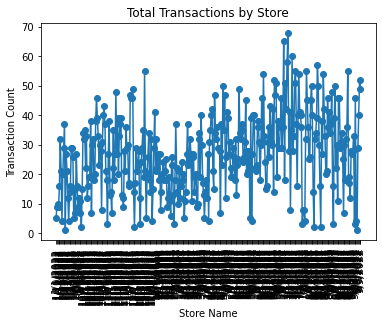

In [7]:
# Group the data by store name and calculate the total transactions
grouped_data = data.groupby(['TransDate'])['Transaction'].count()

# Plotting the line graph
plt.plot(grouped_data.index, grouped_data.values, marker='o')
plt.xlabel('Store Name')
plt.ylabel('Transaction Count')
plt.title('Total Transactions by Store')
plt.xticks(rotation=90)
plt.show()

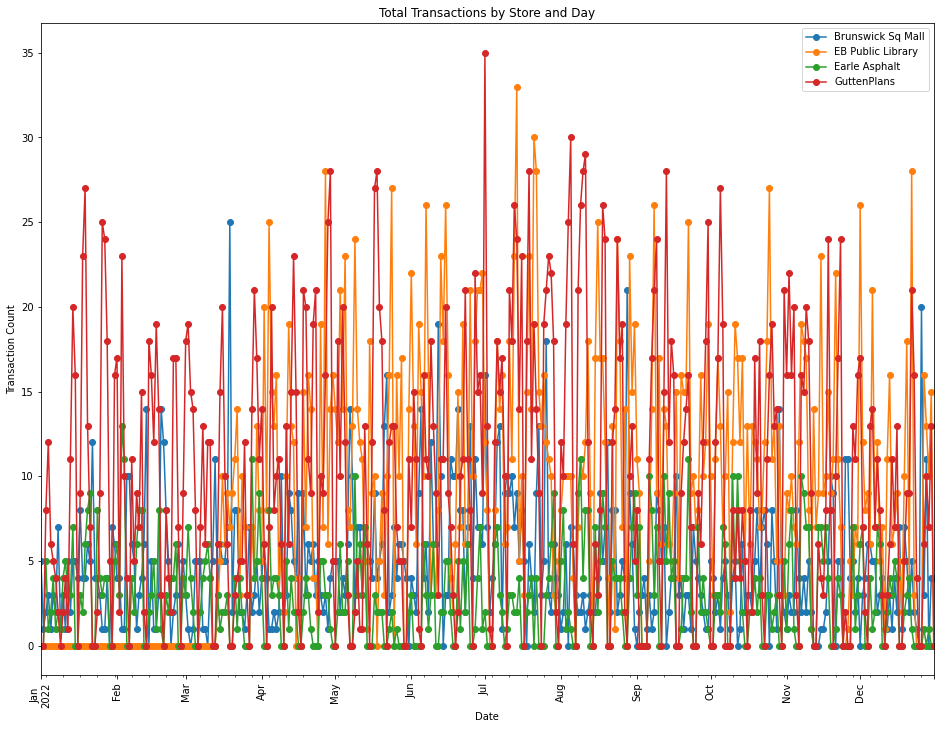

In [26]:
import pandas as pd
import numpy as np

# Read the CSV file
data = pd.read_csv('vend.csv')

# Convert the 'Date' column to datetime format
data['TransDate'] = pd.to_datetime(data['TransDate'])

# Group the data by store and day
grouped_data = data.groupby(['Location', pd.Grouper(key='TransDate', freq='D')])['Transaction'].count().reset_index()

# Pivot the data to create a dataframe with stores as columns and days as rows
pivot_data = grouped_data.pivot(index='TransDate', columns='Location', values='Transaction') #.fillna(0)

# Reindex the dataframe to fill in missing dates and stores with 0
start_date = pivot_data.index.min()
end_date = pivot_data.index.max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
pivot_data = pivot_data.reindex(all_dates)
pivot_data = pivot_data.fillna(0)


# Plotting the line chart
fig, ax = plt.subplots(figsize=(16, 12))  # Set the figure size to make it wider
pivot_data.plot.line(marker='o', ax=ax)

plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Total Transactions by Store and Day')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [24]:
pivot_data

Location,Brunswick Sq Mall,EB Public Library,Earle Asphalt,GuttenPlans
2022-01-02,1.0,0.0,0.0,0.0
2022-01-09,1.0,0.0,1.0,0.0
2022-01-16,4.0,0.0,0.0,0.0
2022-01-23,4.0,0.0,0.0,0.0
2022-01-30,7.0,0.0,0.0,0.0
2022-02-06,10.0,0.0,0.0,0.0
2022-02-13,14.0,0.0,0.0,0.0
2022-02-20,12.0,0.0,0.0,0.0
2022-02-27,3.0,0.0,0.0,0.0
2022-03-06,5.0,0.0,0.0,0.0
